In [5]:

from sklearn import preprocessing

from dataset.dataset import Dataset
from models.sampled_net import SampledNet
from models.swim_net import SWIMNetwork
from view.visualizer import initial_network_vs_converted_sampled_network


### Dataset Creation

In [6]:


xd = 2  # Input space dimensions
num_samples = 5000  # Number of data points
layer_width = 150

dataset = Dataset()
dataset.create_dataset_laplacian_of_gaussian(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

### Train network with SWIM

In [7]:
model_base_swim = SWIMNetwork().fit(dataset.X_train, dataset.y_train, [layer_width])

### Convert the SWIM network, result is identical to the initial network

Layer1 sampling: 100%|██████████| 150/150 [00:00<00:00, 3146.11it/s]


loss(y_base, y_sampled)
r2: 1.0	mse: 3.8122807650072705e-29
are given weight matrices equal:  False
Correlation of weight vector norms: 1.0000


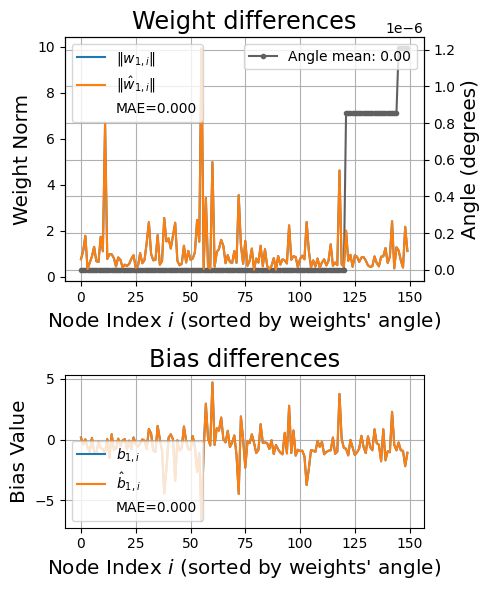

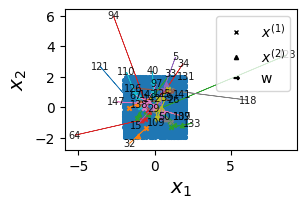

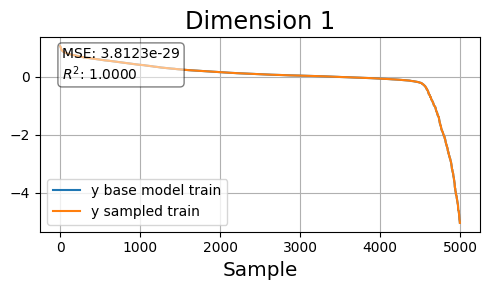

In [8]:
model_base = model_base_swim

y_nn_train = model_base.predict(dataset.X_train)

model_sampled = SampledNet()
x_1_x2_tuples = model_sampled.fit(dataset.X_train, model_base, layer2="bias_only", r=0,
                                  project_onto_boundary=False)
initial_network_vs_converted_sampled_network(dataset, model_base, model_sampled, x_1_x2_tuples)
